<a href="https://colab.research.google.com/github/UmmuGulsumSima/UmmuGulsumSima/blob/main/DOYumurta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
from google.colab import files

# Dosyayı yüklemek için bu satırı çalıştırın
uploaded = files.upload()

Saving Yumurta.csv to Yumurta.csv


In [4]:
import pandas as pd

# Yüklenen dosyayı oku
data = pd.read_csv("Yumurta.csv", encoding="utf-8", delimiter=';')
print(data.head())


   Yaş(Hafta) AĞIRLIK UZUNLUK GENİŞLİK Şekil İndeksi  MUKAVEMET     Ortalama
0          33    55,8   53,22    42,98   80,75911312       5007  1710,246371
1          33    55,2   52,09     43,5   83,50931081       4189   1438,66977
2          33    53,6   52,63    42,61   80,96142884       4732   1618,52381
3          33    57,8   53,31    43,06   80,77283812       5380  1834,610946
4          33    62,9   55,91    44,98   80,45072438       3208  1111,143575


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [6]:
print(data.columns.tolist())


['Yaş(Hafta)', 'AĞIRLIK', 'UZUNLUK', 'GENİŞLİK', 'Şekil İndeksi', 'MUKAVEMET', 'Ortalama']


In [7]:
# Sayısal sütunları tanımlayın
numeric_columns = ['Yaş(Hafta)', 'AĞIRLIK', 'UZUNLUK', 'GENİŞLİK', 'Şekil İndeksi', 'MUKAVEMET', 'Ortalama']

# Sayısal sütunlardaki virgül (',') yerine nokta ('.') koyup, veri türünü sayısal formata dönüştürün
for col in numeric_columns:
    # Eğer sütun string türündeyse virgülleri noktaya çevirip sayısal tipe dönüştür
    if data[col].dtype == 'object':  # Eğer sütun string ise
        data[col] = data[col].str.replace(',', '.').astype(float)
    else:
        # Zaten sayısal bir veri varsa, herhangi bir dönüşüm yapmaya gerek yok
        data[col] = data[col].astype(float)

# Bağımsız ve bağımlı değişkenleri seç
X = data[['Yaş(Hafta)', 'AĞIRLIK', 'UZUNLUK', 'GENİŞLİK', 'Şekil İndeksi', 'MUKAVEMET']]
y = data['Ortalama']

# Veriyi eğitim ve test setlerine böl
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını yazdır
print(f"Eğitim Seti: {X_train.shape}, Test Seti: {X_test.shape}")


Eğitim Seti: (216, 6), Test Seti: (54, 6)


Mean Squared Error (MSE): 2818.4251140585798
Root Mean Squared Error (RMSE): 53.08884170952103
R² Score: 0.9747591057144762


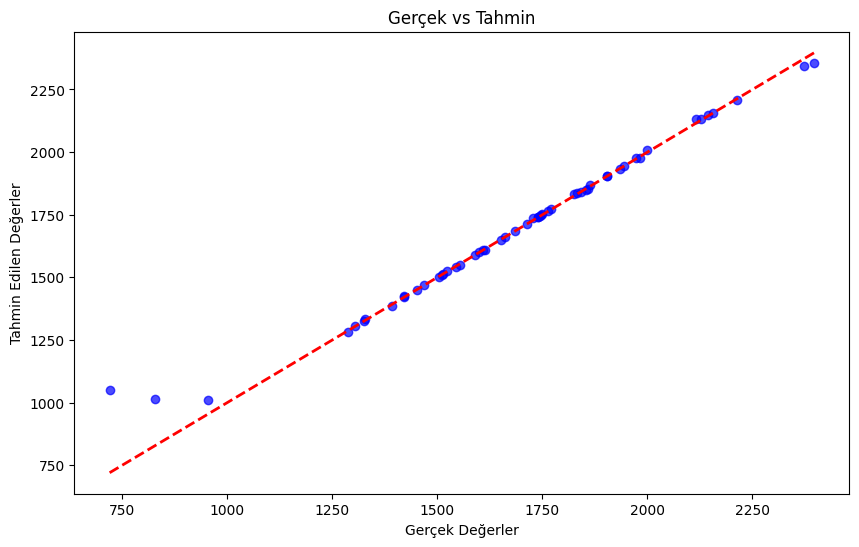

Model başarıyla kaydedildi: random_forest_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle  # Modeli kaydetmek için
from google.colab import files  # Colab'dan indirme için

# Modeli tanımla
rf_model = RandomForestRegressor(random_state=42)

# Modeli eğit
rf_model.fit(X_train, y_train)

# Tahmin yap
y_pred = rf_model.predict(X_test)

# Performans metriklerini hesapla
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Gerçek ve tahmin edilen değerlerin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title("Gerçek vs Tahmin")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.show()

# Modeli kaydet
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)
print("Model başarıyla kaydedildi: random_forest_model.pkl")

# Colab'dan modeli indir
files.download("random_forest_model.pkl")


MSE (Mean Squared Error), modelin tahmin ettiği değerlerle gerçek değerler arasındaki farkın karesinin ortalamasıdır. Buradaki 539.51'lik değer, modelin her bir tahmini için yaptığı hata miktarının ortalama karesini gösteriyo
//
RMSE (Root Mean Squared Error), MSE'nin kareköküdür ve genellikle daha anlamlıdır çünkü aynı birimde sonuç verir (yani, tahminlerinizin birimiyle). Buradaki 23.23'lük değer, modelin tahmin hatalarının ortalama büyüklüğünü anlamanızı sağlar.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Kross-validasyon ile modelin doğruluğunu kontrol et
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Kross-validasyon sonuçları
print(f"Cross-validation MSE: {-cv_scores.mean()}")
print(f"Cross-validation RMSE: {np.sqrt(-cv_scores.mean())}")


Cross-validation MSE: 539.5050266331297
Cross-validation RMSE: 23.22724750445325


In [ ]:
from sklearn.linear_model import LinearRegression

# Modeli tanımla
lr_model = LinearRegression()

# Modeli eğit
lr_model.fit(X_train, y_train)

# Tahmin yap
y_pred_lr = lr_model.predict(X_test)

# Performans metriklerini hesapla
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}")
print(f"Linear Regression - RMSE: {rmse_lr}")
print(f"Linear Regression - R² Score: {r2_lr}")


Linear Regression - MSE: 7.502160482494361e-14
Linear Regression - RMSE: 2.7390072074557164e-07
Linear Regression - R² Score: 1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Modeli tanımla
dt_model = DecisionTreeRegressor(random_state=42)

# Modeli eğit
dt_model.fit(X_train, y_train)

# Tahmin yap
y_pred_dt = dt_model.predict(X_test)

# Performans metriklerini hesapla
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - MSE: {mse_dt}")
print(f"Decision Tree Regressor - RMSE: {rmse_dt}")
print(f"Decision Tree Regressor - R² Score: {r2_dt}")


Decision Tree Regressor - MSE: 1289.6196295299176
Decision Tree Regressor - RMSE: 35.91127440693128
Decision Tree Regressor - R² Score: 0.9884505880340292


SVR çok da uygun bir model değil

In [ ]:
from sklearn.svm import SVR

# Modeli tanımla
svr_model = SVR()

# Modeli eğit
svr_model.fit(X_train, y_train)

# Tahmin yap
y_pred_svr = svr_model.predict(X_test)

# Performans metriklerini hesapla
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - MSE: {mse_svr}")
print(f"Support Vector Regression - RMSE: {rmse_svr}")
print(f"Support Vector Regression - R² Score: {r2_svr}")


Support Vector Regression - MSE: 105476.55067184828
Support Vector Regression - RMSE: 324.77153611708076
Support Vector Regression - R² Score: 0.055386480971274965


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Modeli tanımla
knn_model = KNeighborsRegressor()

# Modeli eğit
knn_model.fit(X_train, y_train)

# Tahmin yap
y_pred_knn = knn_model.predict(X_test)

# Performans metriklerini hesapla
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - MSE: {mse_knn}")
print(f"KNN Regressor - RMSE: {rmse_knn}")
print(f"KNN Regressor - R² Score: {r2_knn}")


KNN Regressor - MSE: 4678.771037625779
KNN Regressor - RMSE: 68.40154265530697
KNN Regressor - R² Score: 0.9580984555673286


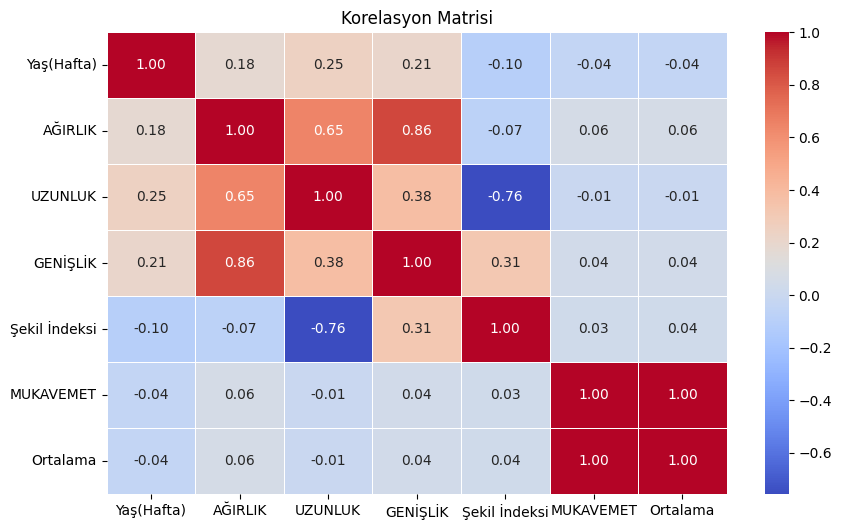

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini oluşturun
corr_matrix = data.corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()
